In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from config import api_key
import matplotlib.patches as mpatches
import json
import traceback

In [113]:
base_url = 'https://developers.themoviedb.org/3/discover/movie-discover'
url="https://api.themoviedb.org/3/discover/movie?api_key="+api_key
pop="&primary_release_year=2019&include_adult=False&page="
GenreID="https://api.themoviedb.org/3/genre/movie/list?api_key="
Gen="&language=en-US"
querys = f"{GenreID}{api_key}{Gen}"

In [114]:
response = requests.get(querys).json()
genres=[]
genreword=[]
for k in range(0,19,1):
    try:
        genres.append(response['genres'][k]['id'])
        genreword.append(response['genres'][k]["name"])
    except:
        genres.append(np.nan)
        genreword.append(np.nan)
        
GenreFrame=pd.DataFrame({"Genres": genres,
                         "Genre Names": genreword
                        })  

GenreFrame

,Genres,Genre Names
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [115]:
Genres = []
Date=[]
MovieTitle=[]
Pop=[]
VoteAvg=[]

for i in range(1,501,1):
    query = f"{url}{pop}{i}"
    response = requests.get(query).json()
    
    for j in range(0,20,1):
        try:
            Pop.append(response['results'][j]["popularity"])
            MovieTitle.append(response['results'][j]["original_title"])
            VoteAvg.append(response['results'][j]["vote_average"])
            Genres.append(response['results'][j]["genre_ids"])
            Date.append(response['results'][j]["release_date"])
            
        except TypeError:
            Pop.append(np.nan)
            MovieTitle.append(np.nan)
            VoteAvg.append(np.nan)
            Genres.append(np.nan)
            Date.append(np.nan)

In [116]:
Movies=pd.DataFrame({'Movie Title':MovieTitle,
                    'Popular Score':Pop,
                    'Vote Average':VoteAvg,
                    'Genres':Genres,
                    'Release Date': Date})

In [117]:
Movies.to_csv('movies.csv',index=False)

In [118]:
Movies = Movies[Movies.astype(str)['Genres'] != '[]']
# A ton of our Genre values were listed as '[]', which wasn't registering as NaN, NA, null, or 0. Probably the main reason
# later edits became so difficult

In [119]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date
0,Ad Astra,406.677,6.0,"[12, 18, 9648, 878, 53]",2019-09-17
1,Star Wars: The Rise of Skywalker,352.490,6.5,"[28, 12, 878]",2019-12-18
2,Jumanji: The Next Level,180.390,6.8,"[28, 12, 35, 14]",2019-12-04
3,Frozen II,176.921,7.1,"[12, 16, 10751]",2019-11-20
4,1917,144.188,8.0,"[18, 10752]",2019-12-25
...,...,...,...,...,...
9992,ELEVADOR,1.190,0.0,"[35, 878]",2019-06-12
9993,南游记记,0.600,0.0,[99],2019-07-21
9995,慕伶，一鸣，伟明,0.600,0.0,"[18, 10751]",2019-07-23
9996,Fragmentos de una amiga desconocida,0.600,0.0,[99],2019-07-11


In [120]:
Movies.reset_index(inplace=True)

In [121]:
Movies = Movies.drop(columns='index')

In [122]:
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date
0,Ad Astra,406.677,6.0,"[12, 18, 9648, 878, 53]",2019-09-17
1,Star Wars: The Rise of Skywalker,352.490,6.5,"[28, 12, 878]",2019-12-18
2,Jumanji: The Next Level,180.390,6.8,"[28, 12, 35, 14]",2019-12-04
3,Frozen II,176.921,7.1,"[12, 16, 10751]",2019-11-20
4,1917,144.188,8.0,"[18, 10752]",2019-12-25
...,...,...,...,...,...
8292,ELEVADOR,1.190,0.0,"[35, 878]",2019-06-12
8293,南游记记,0.600,0.0,[99],2019-07-21
8294,慕伶，一鸣，伟明,0.600,0.0,"[18, 10751]",2019-07-23
8295,Fragmentos de una amiga desconocida,0.600,0.0,[99],2019-07-11


In [123]:
Movies['Month']=pd.DatetimeIndex(Movies["Release Date"]).month

Janscore = Movies.loc[Movies["Month"] == 1]
Febscore= Movies.loc[Movies["Month"] == 2]
Marscore= Movies.loc[Movies["Month"] == 3]
Aprscore= Movies.loc[Movies["Month"] == 4]
Mayscore= Movies.loc[Movies["Month"] == 5]
Junscore= Movies.loc[Movies["Month"] == 6]
Julscore= Movies.loc[Movies["Month"] == 7]
Augscore= Movies.loc[Movies["Month"] == 8]
Septscore= Movies.loc[Movies["Month"] == 9]
Octscore= Movies.loc[Movies["Month"] == 10]
Novscore= Movies.loc[Movies["Month"] == 11]
Decscore= Movies.loc[Movies["Month"] == 12]

Jan=Janscore.loc[Janscore['Popular Score'].idxmax()]
Ja=Jan['Genres'][0]
Feb=Febscore.loc[Febscore['Popular Score'].idxmax()]
Fe=Feb['Genres'][0]
Mar=Marscore.loc[Marscore['Popular Score'].idxmax()]
Ma=Mar['Genres'][0]
Apr=Aprscore.loc[Aprscore['Popular Score'].idxmax()]
Ap=Apr['Genres'][0]
May=Mayscore.loc[Mayscore['Popular Score'].idxmax()]
Mayo=May['Genres'][0]
June=Junscore.loc[Junscore['Popular Score'].idxmax()]
Junio=June['Genres'][0]
July=Julscore.loc[Julscore['Popular Score'].idxmax()]
Julio=July['Genres'][0]
Aug=Augscore.loc[Augscore['Popular Score'].idxmax()]
Au=Aug['Genres'][0]
Sept=Septscore.loc[Septscore['Popular Score'].idxmax()]
Se=Sept['Genres'][0]
Oct=Octscore.loc[Octscore['Popular Score'].idxmax()]
Oc=Oct['Genres'][0]
Nov=Novscore.loc[Novscore['Popular Score'].idxmax()]
No=Nov['Genres'][0]
Dec=Decscore.loc[Decscore['Popular Score'].idxmax()]
De=Dec['Genres'][0]
De

28

In [124]:
Months=Movies.groupby(Movies["Month"])
MaxMonthScore=Months["Popular Score"].max()
MaxMonthScore
TopGenreframe=pd.DataFrame({"Month":["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"],
                            "Genres":[Ja,Fe,Ma,Ap,Mayo,Junio,Julio,Au,Se,Oc,No,De],
                            "MonthID":[1,2,3,4,5,6,7,8,9,10,11,12]
                             
                            
    
                            })
MaxM=pd.DataFrame({"Month":["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"],
                            "Top Score":[MaxMonthScore[1],MaxMonthScore[2],MaxMonthScore[3],MaxMonthScore[4],MaxMonthScore[5]
                                     ,MaxMonthScore[6],MaxMonthScore[7],MaxMonthScore[8],MaxMonthScore[9],MaxMonthScore[10],
                                     MaxMonthScore[11],MaxMonthScore[12]]  
                             
                            
    
                            })

Basis=pd.merge(TopGenreframe,MaxM,how="inner",on="Month")
Basis

,Month,Genres,MonthID,Top Score
0,Jan,12,1,33.986
1,Feb,18,2,29.031
2,Mar,28,3,37.946
3,Apr,28,4,46.024
4,May,35,5,115.718
5,June,28,6,48.823
6,July,35,7,162.435
7,Aug,18,8,84.328
8,Sep,12,9,406.677
9,Oct,80,10,153.140


In [125]:
New=pd.merge(GenreFrame,Basis,how="inner",on="Genres")

New.sort_values(by='MonthID', inplace=True)
New

,Genres,Genre Names,Month,MonthID,Top Score
4,12,Adventure,Jan,1,33.986
10,18,Drama,Feb,2,29.031
0,28,Action,Mar,3,37.946
1,28,Action,Apr,4,46.024
7,35,Comedy,May,5,115.718
2,28,Action,June,6,48.823
8,35,Comedy,July,7,162.435
11,18,Drama,Aug,8,84.328
5,12,Adventure,Sep,9,406.677
9,80,Crime,Oct,10,153.140


In [126]:
BestMonth = pd.DataFrame(columns=['Month', 'Genre', 'Top Score', 'Month ID'])
BestMonth

,Month,Genre,Top Score,Month ID


In [127]:
BestMonth['Month'] = New['Month']
BestMonth['Month ID'] = New['MonthID']
BestMonth['Genre'] = New['Genre Names']
BestMonth['Top Score'] = New['Top Score']

BestMonth.set_index('Month ID', inplace=True)

BestMonth

,Month,Genre,Top Score
Month ID,,,
1,Jan,Adventure,33.986
2,Feb,Drama,29.031
3,Mar,Action,37.946
4,Apr,Action,46.024
5,May,Comedy,115.718
6,June,Action,48.823
7,July,Comedy,162.435
8,Aug,Drama,84.328
9,Sep,Adventure,406.677


In [128]:
Parse=Movies["Genres"].apply(pd.Series)

In [129]:
Parse.columns=["Genre1","Genre2","Genre3","Genre4","Genre5","Genre6","Genre7"]

In [130]:
Parse.fillna(0)

,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
0,12.0,18.0,9648.0,878.0,53.0,0.0,0.0
1,28.0,12.0,878.0,0.0,0.0,0.0,0.0
2,28.0,12.0,35.0,14.0,0.0,0.0,0.0
3,12.0,16.0,10751.0,0.0,0.0,0.0,0.0
4,18.0,10752.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8292,35.0,878.0,0.0,0.0,0.0,0.0,0.0
8293,99.0,0.0,0.0,0.0,0.0,0.0,0.0
8294,18.0,10751.0,0.0,0.0,0.0,0.0,0.0
8295,99.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
count1 = Parse["Genre1"].value_counts()
count2 = Parse["Genre2"].value_counts()
count3 = Parse["Genre3"].value_counts()
count4 = Parse["Genre4"].value_counts()
count5 = Parse["Genre5"].value_counts()
count6 = Parse["Genre6"].value_counts()
count7 = Parse["Genre7"].value_counts()

count1df = pd.DataFrame(data=count1)
count2df = pd.DataFrame(data=count2)
count3df = pd.DataFrame(data=count3)
count4df = pd.DataFrame(data=count4)
count5df = pd.DataFrame(data=count5)
count6df = pd.DataFrame(data=count6)
count7df = pd.DataFrame(data=count7)

count1df.reset_index(inplace=True)
count2df.reset_index(inplace=True)
count3df.reset_index(inplace=True)
count4df.reset_index(inplace=True)
count5df.reset_index(inplace=True)
count6df.reset_index(inplace=True)
count7df.reset_index(inplace=True)

In [132]:
merge1=pd.merge(count1df, count2df, how='left', on='index')
merge2=pd.merge(merge1, count3df, how='left', on='index')
merge3=pd.merge(merge2, count4df, how='left', on='index')
merge4=pd.merge(merge3, count5df, how='left', on='index')
merge5=pd.merge(merge4, count6df, how='left', on='index')
finalmerge=pd.merge(merge5, count7df, how='left', on='index')
finalmerge.set_index('index', inplace=True)

In [133]:
finalmerge['sum'] = finalmerge.sum(axis=1)
finalmerge['sum']

index
18.0       3018.0
99.0       1900.0
35.0       1767.0
27.0        898.0
28.0        602.0
16.0        410.0
53.0        980.0
10749.0     780.0
80.0        442.0
12.0        253.0
10402.0     338.0
878.0       297.0
9648.0      305.0
14.0        273.0
10751.0     350.0
36.0        229.0
10770.0     411.0
37.0         35.0
10752.0     104.0
Name: sum, dtype: float64

In [134]:
ReleaseGenreFrame = GenreFrame.sort_values(by='Genres')
ReleaseGenreFrame = ReleaseGenreFrame.rename(columns={'Genres':'index'})
ReleaseGenreFrame

,index,Genre Names
1,12,Adventure
8,14,Fantasy
2,16,Animation
6,18,Drama
10,27,Horror
0,28,Action
3,35,Comedy
9,36,History
18,37,Western
16,53,Thriller


In [135]:
Releases = pd.DataFrame(data=finalmerge['sum'])
Releases.reset_index(inplace=True)
Releases = Releases.astype({'index': 'int64','sum': 'int64'})

In [136]:
TotalFrame = Releases.sort_values(by='index')
TotalFrame

,index,sum
9,12,253
13,14,273
5,16,410
0,18,3018
3,27,898
4,28,602
2,35,1767
15,36,229
17,37,35
6,53,980


In [137]:
TotalReleases = pd.merge(ReleaseGenreFrame,TotalFrame,how='inner', on='index')

In [138]:
TotalReleases = TotalReleases.sort_values(by='sum', ascending=False)
TotalReleases = TotalReleases.rename(columns={'index':'Genre ID', 'Genre Names': 'Genre', 'sum':'Total Count'})
TotalReleases.set_index('Genre ID', inplace=True)

In [139]:
TotalReleases

,Genre,Total Count
Genre ID,,
18,Drama,3018
99,Documentary,1900
35,Comedy,1767
53,Thriller,980
27,Horror,898
10749,Romance,780
28,Action,602
80,Crime,442
10770,TV Movie,411


In [140]:
TotalReleases.dtypes

Genre          object
Total Count     int64
dtype: object

In [142]:
topmovies = Movies[:100]
topgenres = topmovies['Genres']
topcount = topgenres.value_counts()
topcount


TypeError: unhashable type: 'list'

In [ ]:
topgenres.dtypes

In [ ]:
topcombos = topcount.nlargest(10)
topcombos = pd.DataFrame(data=topcombos)
topcombos.reset_index(inplace=True)

In [ ]:
topcombos = topcombos.rename(columns={'index': 'Genre IDs','Genres':'Count'})
topcombos

In [ ]:
topcombos = topcombos[topcombos['Genre IDs'].map(lambda d: len(d)) > 1]
topcombos.reset_index(inplace=True)
topcombos.drop(columns='index', inplace=True)
topslice = topcombos[0:3]
topcombos

In [ ]:
Top3Combo = pd.DataFrame(columns=['Genre IDs', 'Genres', 'Top 100 Count'])

In [ ]:
Top3Combo['Genre IDs'] = topslice['Genre IDs']
Top3Combo['Top 100 Count'] = topslice['Count']
Top3Combo

In [ ]:
print(GenreFrame.loc[GenreFrame['Genres'] == 28])
print(GenreFrame.loc[GenreFrame['Genres'] == 12])
print(GenreFrame.loc[GenreFrame['Genres'] == 878])
print(GenreFrame.loc[GenreFrame['Genres'] == 53])
print(GenreFrame.loc[GenreFrame['Genres'] == 35])
print(GenreFrame.loc[GenreFrame['Genres'] == 10749])

In [ ]:
Top3Combo['Genres'] = ['Action, Adventure, Science Fiction','Action, Thriller','Comedy, Romance']
# Hardcoded the values based on the IDs because the values are going to be unchanging and I was honestly super tired 
# of figuring out how to loop through the IDs in this set
# However, we can swap it to a loop if you guys would like to
Top3Combo

In [ ]:
# Final 3 conclusive dataframes (based on the first 3 questions)
# --------------------------------------------------------------
BestMonth

In [ ]:
TotalReleases

In [ ]:
Top3Combo

In [ ]:
# We can extrapolate whatever other data we need fairly easily now I think
# If we imitate what we've done so far, we should be able to query for pretty much anything within our original dataframe

In [ ]:
plt.bar(BestMonth["Month"],BestMonth["Top Score"], align='center', alpha=0.5)
plt.legend
plt.ylabel('Top Scores per Month')
plt.title('Top Popularity Score per Month')


# GenandMon=

In [ ]:
plt.bar(BestMonth["Genre"],BestMonth["Top Score"], align='center', alpha=0.5)

plt.ylabel('Top Scoring Genre per Month')
plt.title('Top Popularity Genre per Month')

In [ ]:
# I'm pretty burnt out for tonight after figuring the loops out so I'll tackle the graph stuff with you guys later

# monthly genre breakdown and combinations

In [143]:
#group dates together by month
#count and identify movies per month
#determine the Genre combinations for each movie
#
#Starting DataFrame
Movies

,Movie Title,Popular Score,Vote Average,Genres,Release Date,Month
0,Ad Astra,406.677,6.0,"[12, 18, 9648, 878, 53]",2019-09-17,9.0
1,Star Wars: The Rise of Skywalker,352.490,6.5,"[28, 12, 878]",2019-12-18,12.0
2,Jumanji: The Next Level,180.390,6.8,"[28, 12, 35, 14]",2019-12-04,12.0
3,Frozen II,176.921,7.1,"[12, 16, 10751]",2019-11-20,11.0
4,1917,144.188,8.0,"[18, 10752]",2019-12-25,12.0
...,...,...,...,...,...,...
8292,ELEVADOR,1.190,0.0,"[35, 878]",2019-06-12,6.0
8293,南游记记,0.600,0.0,[99],2019-07-21,7.0
8294,慕伶，一鸣，伟明,0.600,0.0,"[18, 10751]",2019-07-23,7.0
8295,Fragmentos de una amiga desconocida,0.600,0.0,[99],2019-07-11,7.0


In [144]:
#narrowed down DataFrame to information specifically sought
movies_df=Movies[['Movie Title','Popular Score','Genres','Release Date']]

#movies_df['Genres'] =movies_df['Genres'].astype(str)#.apply(lambda x: #', '.join(Movies["Genres"].astype(str)))
movies_df.head()

,Movie Title,Popular Score,Genres,Release Date
0,Ad Astra,406.677,"[12, 18, 9648, 878, 53]",2019-09-17
1,Star Wars: The Rise of Skywalker,352.490,"[28, 12, 878]",2019-12-18
2,Jumanji: The Next Level,180.390,"[28, 12, 35, 14]",2019-12-04
3,Frozen II,176.921,"[12, 16, 10751]",2019-11-20
4,1917,144.188,"[18, 10752]",2019-12-25


In [145]:
movies_df.dtypes

Movie Title       object
Popular Score    float64
Genres            object
Release Date      object
dtype: object

In [146]:
#convert movie dataframe 'Release Date' into a datetime format from an objects
#isolating the month in the "Release Date"
import datetime
movies_df['Release Date']=pd.to_datetime(movies_df['Release Date']).dt.month
movies_df

c:\users\james\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Movie Title,Popular Score,Genres,Release Date
0,Ad Astra,406.677,"[12, 18, 9648, 878, 53]",9.0
1,Star Wars: The Rise of Skywalker,352.490,"[28, 12, 878]",12.0
2,Jumanji: The Next Level,180.390,"[28, 12, 35, 14]",12.0
3,Frozen II,176.921,"[12, 16, 10751]",11.0
4,1917,144.188,"[18, 10752]",12.0
...,...,...,...,...
8292,ELEVADOR,1.190,"[35, 878]",6.0
8293,南游记记,0.600,[99],7.0
8294,慕伶，一鸣，伟明,0.600,"[18, 10751]",7.0
8295,Fragmentos de una amiga desconocida,0.600,[99],7.0


In [147]:
movies_df.dtypes

Movie Title       object
Popular Score    float64
Genres            object
Release Date     float64
dtype: object

In [148]:
#sorted movie values ascending by months and descending by popular score
sorted_values=movies_df.sort_values(['Release Date','Popular Score'], ascending=[1,0])
sorted_values

,Movie Title,Popular Score,Genres,Release Date
55,How to Train Your Dragon: The Hidden World,33.986,"[12, 16, 10751]",1.0
68,Alita: Battle Angel,31.344,"[28, 12, 878, 53]",1.0
83,Glass,27.651,"[18, 878, 53]",1.0
124,Serenity,17.357,"[18, 9648, 53]",1.0
133,Bikini Valley Car Wash,16.838,[35],1.0
...,...,...,...,...
7400,Jouluiloa Ukrainaan,0.600,[99],12.0
7621,The Budding Artists,0.600,[99],12.0
7636,The Crucible's Scepter,0.600,"[35, 18]",12.0
8233,Daisy,0.600,"[27, 9648, 53]",12.0


In [149]:
expanded_data=sorted_values.explode('Genres')

expanded_data.dtypes



Movie Title       object
Popular Score    float64
Genres            object
Release Date     float64
dtype: object

In [150]:
expanded_data.head()

,Movie Title,Popular Score,Genres,Release Date
55,How to Train Your Dragon: The Hidden World,33.986,12,1.0
55,How to Train Your Dragon: The Hidden World,33.986,16,1.0
55,How to Train Your Dragon: The Hidden World,33.986,10751,1.0
68,Alita: Battle Angel,31.344,28,1.0
68,Alita: Battle Angel,31.344,12,1.0


In [151]:
#expanded_data["Genres"] = pd.to_numeric(expanded_data["Genres"], downcast="float")

expanded_data.dtypes

Movie Title       object
Popular Score    float64
Genres            object
Release Date     float64
dtype: object

In [152]:
#movies_df.groupby(['Release Date',(['Genres'])]).count()
counts=1
expanded_data['counts']=counts

In [159]:
GenreFrame

,Genres,Genre Names
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [189]:
rmv_data=expanded_data.drop(["Movie Title","Release Date","Popular Score"], axis=1)
count_data=rmv_data.groupby(['Genres']).count()


count_data

,counts
Genres,
12,253
14,273
16,410
18,3018
27,898
28,602
35,1767
36,229
37,35


In [163]:
#pandas.merge(left, right, how: str = 'inner', on=None, left_on=None, right_on=None, left_index: bool = False, right_index: bool = False, sort: bool = False, suffixes=('_x', '_y'), copy: bool = True, indicator: bool = False, validate=None) → 'DataFrame'[source]¶
#df1.merge(df2, left_on='lkey', right_on='rkey')
counts_merge_df=GenreFrame.merge(count_data, on='Genres')
counts_merge_df

,Genres,Genre Names,counts
0,28,Action,602
1,12,Adventure,253
2,16,Animation,410
3,35,Comedy,1767
4,80,Crime,442
5,99,Documentary,1900
6,18,Drama,3018
7,10751,Family,350
8,14,Fantasy,273
9,36,History,229


In [246]:
Action = counts_merge_df.iloc[0,2]    
Adventure=counts_merge_df.iloc[1,2]
Animation=counts_merge_df.iloc[2,2]
Comedy=counts_merge_df.iloc[3,2]
Crime=counts_merge_df.iloc[4,2]
Documentary=counts_merge_df.iloc[5,2]
Drama=counts_merge_df.iloc[6,2]
Family=counts_merge_df.iloc[7,2]
Fantasy=counts_merge_df.iloc[8,2]
History=counts_merge_df.iloc[9,2]
Horror=counts_merge_df.iloc[10,2]
Music=counts_merge_df.iloc[11,2]
Mystery=counts_merge_df.iloc[12,2]
Romance=counts_merge_df.iloc[13,2]
Science_Fiction=counts_merge_df.iloc[14,2]
TV_Movie=counts_merge_df.iloc[15,2]
Thriller=counts_merge_df.iloc[16,2]
War=counts_merge_df.iloc[17,2]
Western=counts_merge_df.iloc[18,2]

In [249]:
genre_sum = counts_merge_df['counts'].sum()

In [257]:
ActionPer=Action/genre_sum*100
AdventurePer=Adventure/genre_sum*100
AnimationPer=Animation/genre_sum*100
ComedyPer=Comedy/genre_sum*100
CrimePer=Crime/genre_sum*100
DocumentaryPer=Documentary/genre_sum*100
DramaPer=Drama/genre_sum*100
FamilyPer=Family/genre_sum*100
FantasyPer=Fantasy/genre_sum*100
HistoryPer=History/genre_sum*100
HorrorPer=Horror/genre_sum*100
MusicPer=Music/genre_sum*100
MysteryPer=Mystery/genre_sum*100
RomancePer=Romance/genre_sum*100
Science_FictionPer=Science_Fiction/genre_sum*100
TV_MoviePer=TV_Movie/genre_sum*100
ThrillerPer=Thriller/genre_sum*100
WarPer=War/genre_sum*100
WesternPer=Western/genre_sum*100

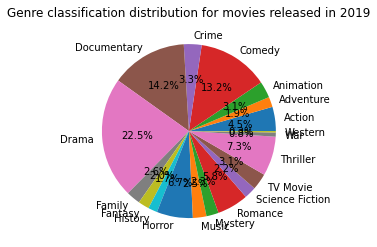

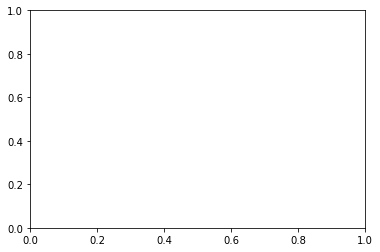

In [278]:
#create pie chart showing percentages of total genres of movies released for 2019
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','History','Horror',
'Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western']

plt.pie([ActionPer,AdventurePer,AnimationPer,ComedyPer,CrimePer,DocumentaryPer,DramaPer,FamilyPer,FantasyPer,HistoryPer,
        HorrorPer,MusicPer,MysteryPer,RomancePer,Science_FictionPer,TV_MoviePer,ThrillerPer,WarPer,WesternPer],labels=labels,
       autopct='%1.1f%%')

plt.title("Genre classification distribution for movies released in 2019")

#sizes = [15, 30, 45, 10]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax1 = plt.subplots()
#ax1.pie(sizes, explode=explode, shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

In [ ]:
#create pie chart showing percentages of total genres of movies released for 2019
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','History','Horror',
'Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
#create line graph to determine performance of genre per year
#what genres are associated with high populartity scores
#Determine highest for each  month 

In [287]:
expanded_data

,Movie Title,Popular Score,Genres,Release Date,counts
55,How to Train Your Dragon: The Hidden World,33.986,12,1.0,1
55,How to Train Your Dragon: The Hidden World,33.986,16,1.0,1
55,How to Train Your Dragon: The Hidden World,33.986,10751,1.0,1
68,Alita: Battle Angel,31.344,28,1.0,1
68,Alita: Battle Angel,31.344,12,1.0,1
...,...,...,...,...,...
7636,The Crucible's Scepter,0.600,18,12.0,1
8233,Daisy,0.600,27,12.0,1
8233,Daisy,0.600,9648,12.0,1
8233,Daisy,0.600,53,12.0,1


In [284]:
BestMonth

,Month,Genre,Top Score
Month ID,,,
1,Jan,Adventure,33.986
2,Feb,Drama,29.031
3,Mar,Action,37.946
4,Apr,Action,46.024
5,May,Comedy,115.718
6,June,Action,48.823
7,July,Comedy,162.435
8,Aug,Drama,84.328
9,Sep,Adventure,406.677


NameError: name 'ax' is not defined

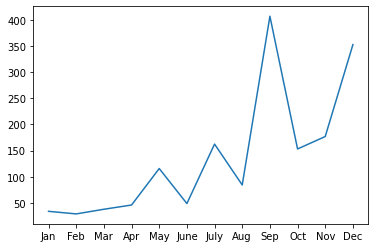

In [305]:
#x month y top score()

plt.plot(BestMonth.Month, BestMonth['Top Score'])
#plt.title("Top Popularity scores by Month and Ge
(xlabel='Months')
#plt.ylabel
#('Popularity Score')
#plt.legend()

In [ ]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

# Monthly genre breakdow and combination...END